<a href="https://colab.research.google.com/github/satya7669/Housing-prices-scikit-learn-Linear-Regression-/blob/main/scikit1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd  # For data loading and manipulation
import matplotlib.pyplot as plt  # For creating plots
from sklearn.model_selection import train_test_split  # To split data into training and testing sets
from sklearn.linear_model import LinearRegression  # The model we'll use
from sklearn.metrics import mean_squared_error  # To evaluate the model

In [19]:
data = pd.read_csv('Housing prices linear regression.csv')


In [20]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [21]:
data.shape

(1460, 81)

In [22]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [24]:
data = data[['GrLivArea','SalePrice']].dropna()

In [25]:
print(data.describe())

         GrLivArea      SalePrice
count  1460.000000    1460.000000
mean   1515.463699  180921.195890
std     525.480383   79442.502883
min     334.000000   34900.000000
25%    1129.500000  129975.000000
50%    1464.000000  163000.000000
75%    1776.750000  214000.000000
max    5642.000000  755000.000000


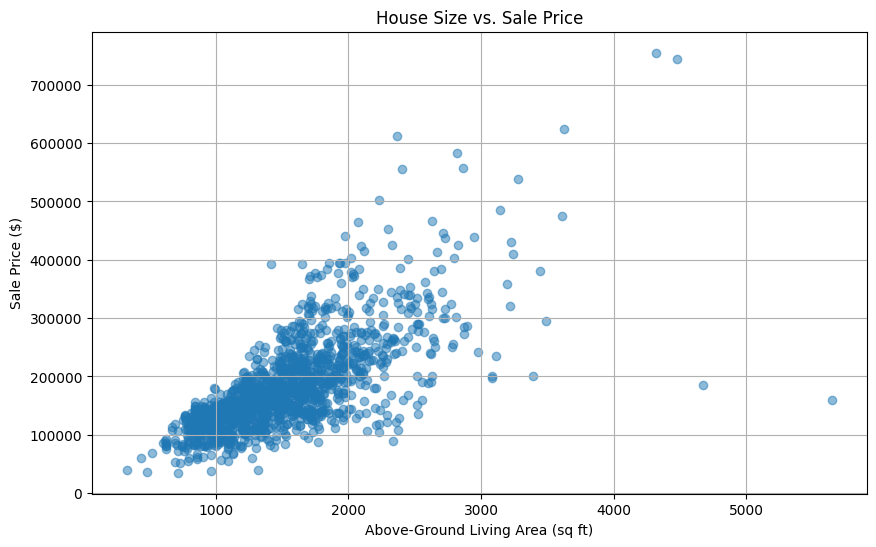

In [26]:
# Create a scatter plot
plt.figure(figsize=(10, 6))  # Set plot size
plt.scatter(data['GrLivArea'], data['SalePrice'], alpha=0.5)  # Plot points with some transparency
plt.title('House Size vs. Sale Price')  # Title
plt.xlabel('Above-Ground Living Area (sq ft)')  # X-axis label
plt.ylabel('Sale Price ($)')  # Y-axis label
plt.grid(True)  # Add grid for readability
plt.show()  # Display the plot

In [27]:
# Define X (features) and y (target)
X = data[['GrLivArea']]
y = data['SalePrice']

# Split: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # random_state for reproducibility

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 1168
Testing set size: 292


In [28]:
# y = mx+c

# Create the model
model = LinearRegression()

# Train it
model.fit(X_train, y_train)

# Print the learned parameters
print(f"Intercept (c): {model.intercept_}")
print(f"Coefficient (m for GrLivArea): {model.coef_[0]}")

Intercept (c): 24899.74815733818
Coefficient (m for GrLivArea): 102.48895891672333


In [29]:
# Predict on test set
y_pred = model.predict(X_test)

# Calculate error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 3418946311.180807


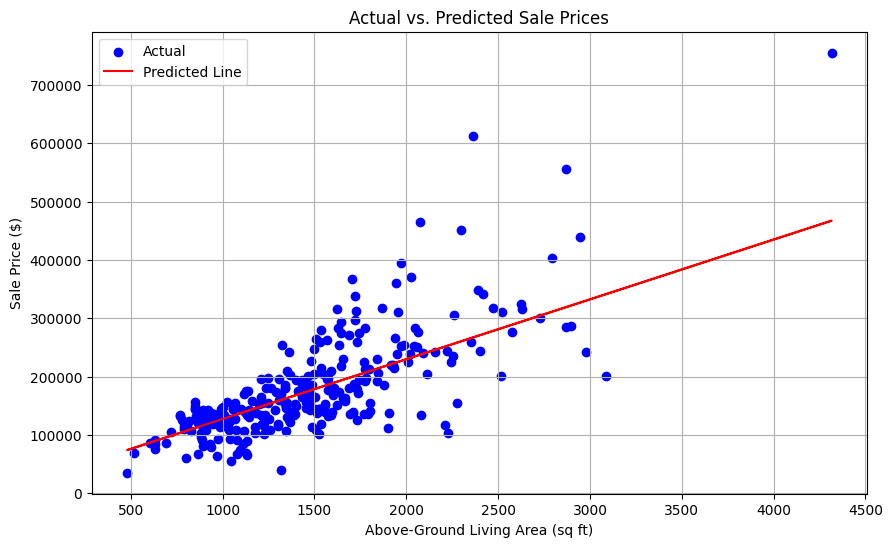

In [30]:
# Plot actual vs. predicted
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')  # Actual points
plt.plot(X_test, y_pred, color='red', label='Predicted Line')  # Regression line
plt.title('Actual vs. Predicted Sale Prices')
plt.xlabel('Above-Ground Living Area (sq ft)')
plt.ylabel('Sale Price ($)')
plt.legend()  # Show labels
plt.grid(True)
plt.show()